<a href="https://colab.research.google.com/github/DLPY/Unsupervised-Learning-Session-2/blob/main/Local_Outlier_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Local Outlier Factor**

In [ ]:
import random
import pandas as pd

pct = [.01,.08,.12]
amounts = [1000, 2000, 3000]
charges = pd.DataFrame()

for i in range(0, 1000):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * .04 * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

for i in range(0, 10):
  amount = random.choice(amounts) * (random.uniform(.95, 1.05))
  bank_charge = amount * random.choice(pct) * (random.uniform(.95, 1.05))
  linedict = {'Amount': [amount], 'Charge':[bank_charge]}
  line = pd.DataFrame(linedict)
  charges = pd.concat([charges, line])

In [ ]:
charges.head(10)

,Amount,Charge,LOF,PCT
0,950.283926,36.673375,-1.264900,0.038592
0,2056.176877,78.890193,-1.092790,0.038367
0,2098.846106,82.765555,-1.086406,0.039434
0,1033.215388,39.434795,-1.051689,0.038167
0,3128.675788,123.381851,-1.034434,0.039436
0,2945.151518,121.006444,-1.011743,0.041087
0,2853.593577,112.411868,-0.979234,0.039393
0,1035.988808,41.872460,-0.998201,0.040418
0,2029.448065,77.613426,-1.044206,0.038244
0,3120.127140,125.174077,-1.011091,0.040118


In [ ]:
charges.tail(10)

,Amount,Charge,LOF,PCT
0,1016.001657,119.448678,-27.140707,0.117567
0,965.221564,118.268377,-27.988001,0.122530
0,1043.707543,81.601084,-21.595137,0.078184
0,2044.023998,19.949097,-59.622649,0.009760
0,3075.548172,30.912454,-33.437742,0.010051
0,1040.522147,85.313659,-21.059534,0.081991
0,2938.046353,234.568852,-42.831232,0.079838
0,1003.627881,76.939110,-36.238843,0.076661
0,1967.050738,224.884272,-43.229518,0.114326
0,2087.896098,20.811879,-61.343327,0.009968


In [ ]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30)
normalized_df=(charges-charges.mean())/charges.std()

clf.fit_predict(normalized_df)
results = clf.negative_outlier_factor_
charges['LOF'] = results.tolist()
charges['PCT'] = charges['Charge'] / charges['Amount']

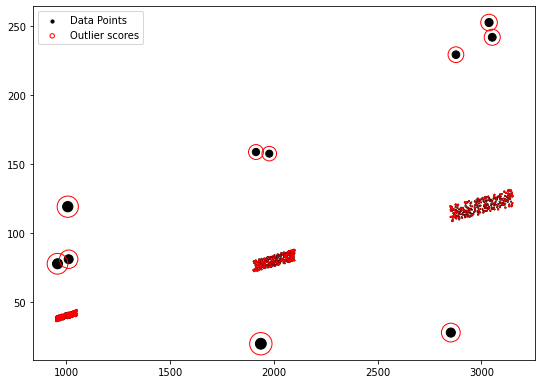

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(9,6.5)
plt.scatter(charges.Amount, charges.Charge, c='black', s=charges.LOF * -1,label="Data Points")
radius = (results.max() - results) / (results.max() - results.min())
plt.scatter(charges.Amount, charges.Charge, s=500 * radius,edgecolors="r",facecolors="none",label="Outlier scores",)
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()


In [ ]:
charges.query('LOF < -1.5')

,Amount,Charge,LOF,PCT
0,3142.535959,130.541571,-1.514287,0.041540
0,2095.688114,87.821135,-1.801355,0.041906
0,3143.293856,131.872198,-2.297684,0.041954
0,1903.192849,72.464920,-1.562324,0.038075
0,2090.347686,87.565168,-1.535154,0.041890
0,1906.112776,72.485479,-1.552645,0.038028
0,1046.587237,43.935670,-1.590506,0.041980
0,1016.001657,119.448678,-103.016466,0.117567
0,965.221564,118.268377,-107.868503,0.122530
0,1043.707543,81.601084,-76.180054,0.078184
